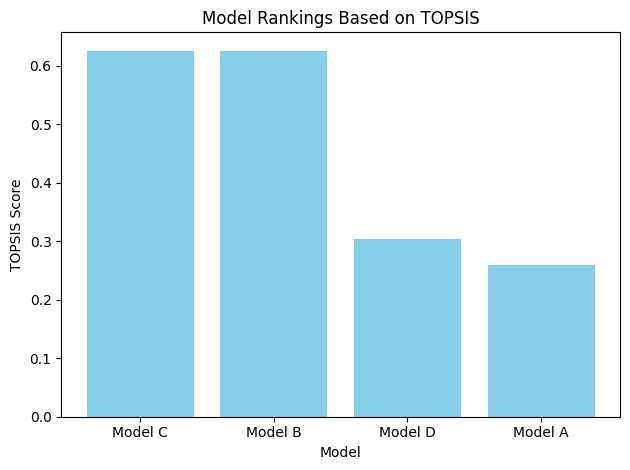

('topsis_results.csv', 'topsis_plot.png')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define the dataset (replace with your actual metrics)
data = {
    'Model': ['Model A', 'Model B', 'Model C', 'Model D'],
    'Accuracy': [0.85, 0.90, 0.88, 0.87],
    'BLEU Score': [0.78, 0.75, 0.80, 0.76],
    'ROUGE Score': [0.83, 0.88, 0.85, 0.84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Step 2: Normalize the metrics
def normalize_data(df, benefit_criteria):
    normalized_df = df.copy()
    for column in benefit_criteria:
        col_max = df[column].max()
        col_min = df[column].min()
        normalized_df[column] = (df[column] - col_min) / (col_max - col_min)
    return normalized_df

benefit_criteria = ['Accuracy', 'BLEU Score', 'ROUGE Score']  # Higher is better
normalized_df = normalize_data(df[benefit_criteria], benefit_criteria)

# Step 3: Assign weights to criteria
weights = np.array([0.4, 0.3, 0.3])  # Weights for Accuracy, BLEU, ROUGE

# Step 4: Weighted normalized matrix
weighted_normalized_df = normalized_df * weights

# Step 5: Calculate the ideal best and ideal worst
ideal_best = weighted_normalized_df.max()
ideal_worst = weighted_normalized_df.min()

# Step 6: Calculate the Euclidean distances to ideal best and worst
distance_to_best = np.sqrt(((weighted_normalized_df - ideal_best) ** 2).sum(axis=1))
distance_to_worst = np.sqrt(((weighted_normalized_df - ideal_worst) ** 2).sum(axis=1))

# Step 7: Calculate the TOPSIS score
topsis_score = distance_to_worst / (distance_to_best + distance_to_worst)

# Step 8: Add results to the original DataFrame
df['TOPSIS Score'] = topsis_score
df['Rank'] = df['TOPSIS Score'].rank(ascending=False)

# Step 9: Save the results to a CSV file
df.to_csv('topsis_results.csv', index=False)

# Step 10: Plot the results
df = df.sort_values(by='Rank')
plt.bar(df['Model'], df['TOPSIS Score'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('TOPSIS Score')
plt.title('Model Rankings Based on TOPSIS')
plt.tight_layout()

# Save the plot as an image
plt.savefig('topsis_plot.png')

# Show the plot
plt.show()

# Return the paths of the saved files
csv_file_path = 'topsis_results.csv'
plot_file_path = 'topsis_plot.png'

csv_file_path, plot_file_path
